In [1]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/M1_S2/ML/ProjetML/src
from mltools import *
from loss import *
from module import *

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/M1_S2/ML/ProjetML/src


# Data 2 gaussien

## Une couche

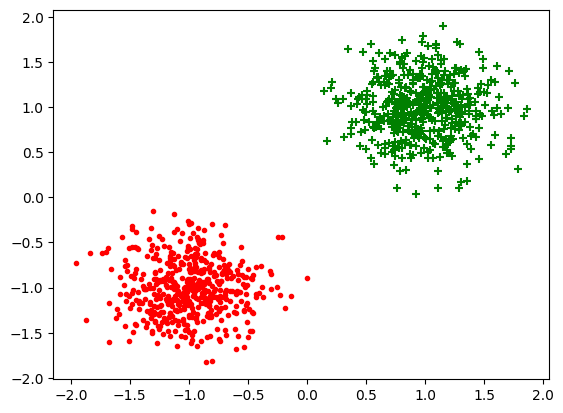

In [2]:
np.random.seed(0)
X, Y = gen_arti()
plot_data(X,Y)

Acc: 0.0


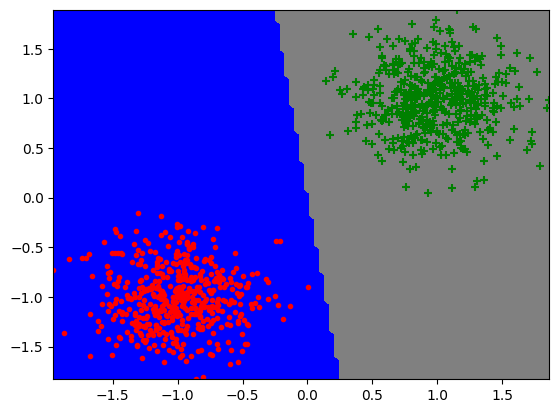

In [3]:
np.random.seed(2)
M = Linear(X.shape[1], 1)
y_pred = M.forward(X)
y_hat = np.sign(y_pred)
plot_frontiere(X,lambda x : np.sign(M.forward(x)),step=100)
plot_data(X,Y)
res = np.where(y_hat == Y, 1, 0).sum()
print("Acc:",res/len(Y))

Acc: 1.0


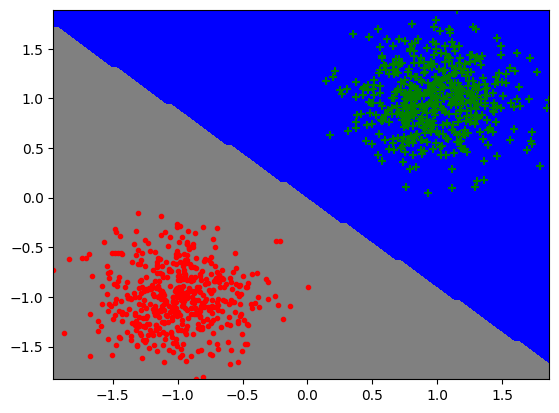

In [4]:
loss = MSELoss()
L = loss.forward(Y,y_hat)
delta = loss.backward(Y,y_pred)
M.backward_update_gradient(X,delta)
M.update_parameters()
#print(M._parameters)
y_pred = M.forward(X)
y_hat = np.sign(y_pred)
plot_frontiere(X,lambda x : np.sign(M.forward(x)),step=100)
plot_data(X,Y)
res = np.where(y_hat == Y, 1, 0).sum()
print("Acc:",res/len(Y))

## Deux couches

Acc: 0.538


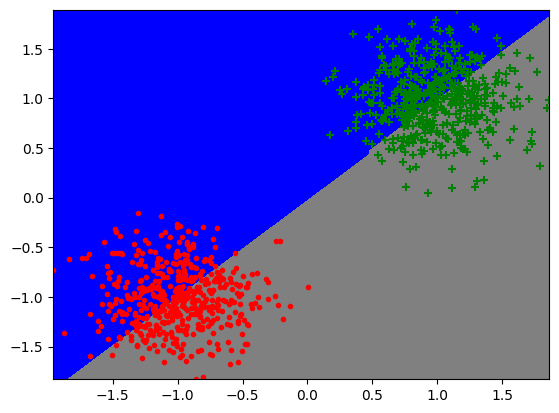

In [5]:
np.random.seed(3)
# Couche 1: 2 neurones, couche 2: 1 neurone
M1 = Linear(X.shape[1], 2)
M2 = Linear(M1._parameters.shape[0], 1)

# Forward
z_1 = M1.forward(X)
z_2 = M2.forward(z_1)
y_hat = np.sign(z_2)

plot_frontiere(X,lambda x : np.sign(M2.forward(M1.forward(x))),step=100)
plot_data(X,Y)
res = np.where(y_hat == Y, 1, 0).sum()
print("Acc:",res/len(Y))

Acc: 0.943


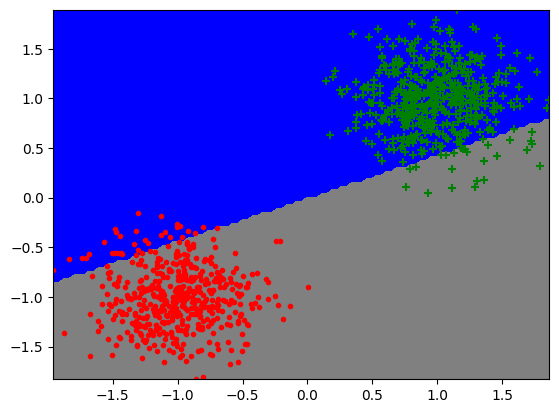

In [6]:
#Back propagation
loss = MSELoss()
delta2 = loss.backward(Y,z_2)
#M2
M2.backward_update_gradient(X,delta2)
delta1= M2.backward_delta(z_1, delta2)
M2.update_parameters(gradient_step=1e-4) # eps 1e-3 trop grand -> sortir de min local

#M1
M1.backward_update_gradient(X,delta1)
M1.update_parameters(gradient_step=1e-4)

#Foward
z_1 = M1.forward(X)
z_2 = M2.forward(z_1)
y_hat = np.sign(z_2)
plot_frontiere(X,lambda x : np.sign(M2.forward(M1.forward(x))),step=100)
plot_data(X,Y)
res = np.where(y_hat == Y, 1, 0).sum()
print("Acc:",res/len(Y))

# Data 4 Gaussien

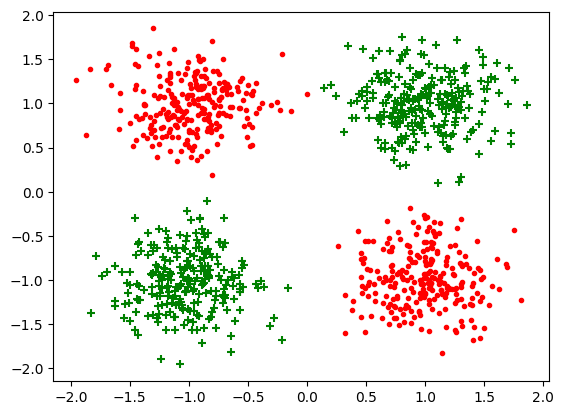

In [34]:
np.random.seed(0)
X, Y = gen_arti(data_type=1)
plot_data(X,Y)

Acc: 0.508


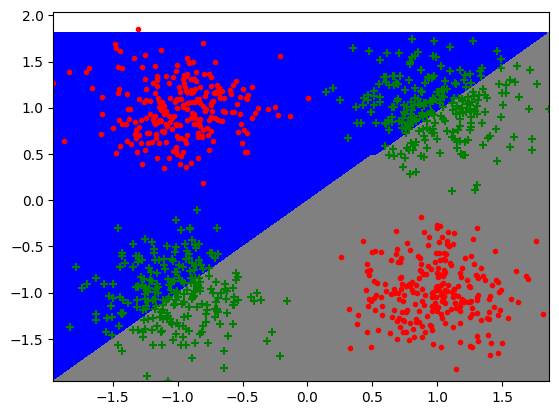

In [35]:
np.random.seed(3)
# Couche 1: 2 neurones, couche 2: 1 neurone
M1 = Linear(X.shape[1], 2)
M2 = Linear(M1._parameters.shape[0], 1)

# Forward
z_1 = M1.forward(X)
z_2 = M2.forward(z_1)
y_hat = np.sign(z_2)

plot_frontiere(X,lambda x : np.sign(M2.forward(M1.forward(x))),step=100)
plot_data(X,Y)
res = np.where(y_hat == Y, 1, 0).sum()
print("Acc:",res/len(Y))

Inter 0, Acc: 0.5
Inter 1, Acc: 0.498
Inter 2, Acc: 0.498
Inter 3, Acc: 0.5
Inter 4, Acc: 0.5
Inter 5, Acc: 0.5
Inter 6, Acc: 0.498
Inter 7, Acc: 0.504
Inter 8, Acc: 0.503
Inter 9, Acc: 0.501


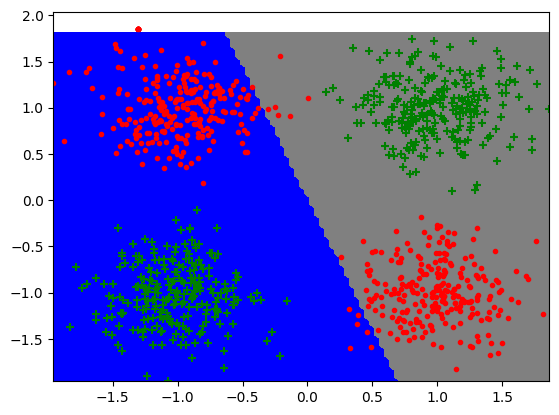

In [36]:
nbiter = 10
for i in range(nbiter):
  loss = MSELoss()
  delta2 = loss.backward(Y,z_2)
  #M2
  M2.backward_update_gradient(X,delta2)
  delta1= M2.backward_delta(z_1, delta2)
  M2.update_parameters(gradient_step=1e-4) # eps 1e-3 trop grand -> sortir de min local

    #M1
  M1.backward_update_gradient(X,delta1)
  M1.update_parameters(gradient_step=1e-4)


  # Forward
  z_1 = M1.forward(X)
  z_2 = M2.forward(z_1)
  y_hat = np.sign(z_2)

  plot_frontiere(X,lambda x : np.sign(M2.forward(M1.forward(x))),step=100)
  plot_data(X,Y)
  res = np.where(y_hat == Y, 1, 0).sum()
  print(f"Inter {i}, Acc:",res/len(Y))

## Data echiquier

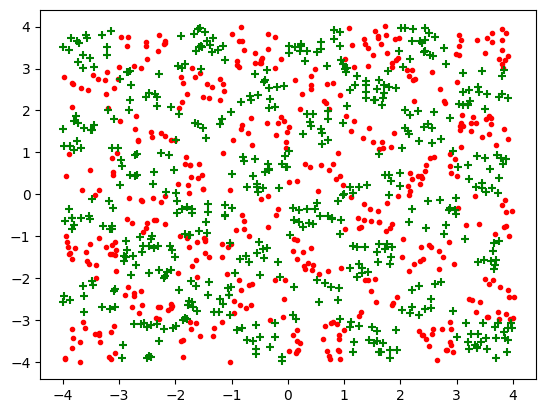

In [38]:
np.random.seed(0)
X, Y = gen_arti(data_type=2)
plot_data(X,Y)

Acc: 0.51


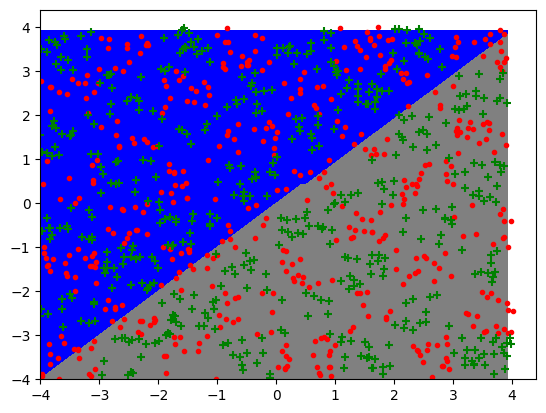

In [39]:
np.random.seed(3)
# Couche 1: 2 neurones, couche 2: 1 neurone
M1 = Linear(X.shape[1], 2)
M2 = Linear(M1._parameters.shape[0], 1)

# Forward
z_1 = M1.forward(X)
z_2 = M2.forward(z_1)
y_hat = np.sign(z_2)

plot_frontiere(X,lambda x : np.sign(M2.forward(M1.forward(x))),step=100)
plot_data(X,Y)
res = np.where(y_hat == Y, 1, 0).sum()
print("Acc:",res/len(Y))

Inter 0, Acc: 0.502
Inter 1, Acc: 0.497
Inter 2, Acc: 0.5
Inter 3, Acc: 0.505
Inter 4, Acc: 0.495
Inter 5, Acc: 0.495
Inter 6, Acc: 0.501
Inter 7, Acc: 0.503
Inter 8, Acc: 0.493
Inter 9, Acc: 0.494


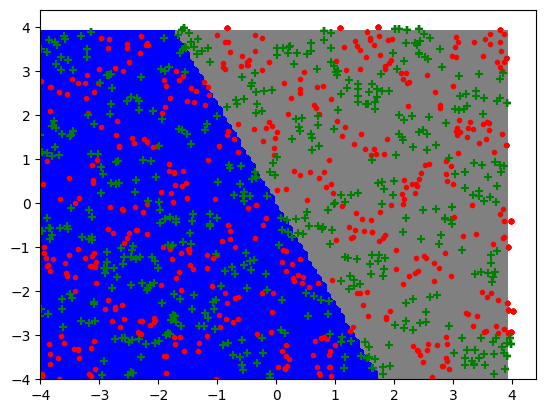

In [40]:
nbiter = 10
for i in range(nbiter):
  loss = MSELoss()
  delta2 = loss.backward(Y,z_2)
  #M2
  M2.backward_update_gradient(X,delta2)
  delta1= M2.backward_delta(z_1, delta2)
  M2.update_parameters(gradient_step=1e-4) # eps 1e-3 trop grand -> sortir de min local

    #M1
  M1.backward_update_gradient(X,delta1)
  M1.update_parameters(gradient_step=1e-4)


  # Forward
  z_1 = M1.forward(X)
  z_2 = M2.forward(z_1)
  y_hat = np.sign(z_2)

  plot_frontiere(X,lambda x : np.sign(M2.forward(M1.forward(x))),step=100)
  plot_data(X,Y)
  res = np.where(y_hat == Y, 1, 0).sum()
  print(f"Inter {i}, Acc:",res/len(Y))